In [113]:
import pandas as pd
import matplotlib.pyplot as plt
from prophet import Prophet
from sklearn.metrics import mean_absolute_error, mean_squared_error

In [115]:
# Loading datasets
train = pd.read_csv("C:/Users/user/Desktop/Walmat_recruiting_sales _forecast/train.csv")
test = pd.read_csv("C:/Users/user/Desktop/Walmat_recruiting_sales _forecast/test.csv")
stores = pd.read_csv("C:/Users/user/Desktop/Walmat_recruiting_sales _forecast/stores.csv")
features = pd.read_csv("C:/Users/user/Desktop/Walmat_recruiting_sales _forecast/features.csv")


In [117]:
#Merging Datasets
df = train.merge(stores, on='Store').merge(features,on=['Store','Date'], how='left')

In [119]:
#Convert date to Datetime format
df['Date'] = pd.to_datetime(df['Date'])

In [121]:
# Sort and Inspect
df = df.sort_values(['Store','Dept','Date'])
print(df.head())

   Store  Dept       Date  Weekly_Sales  IsHoliday_x Type    Size  \
0      1     1 2010-02-05      24924.50        False    A  151315   
1      1     1 2010-02-12      46039.49         True    A  151315   
2      1     1 2010-02-19      41595.55        False    A  151315   
3      1     1 2010-02-26      19403.54        False    A  151315   
4      1     1 2010-03-05      21827.90        False    A  151315   

   Temperature  Fuel_Price  MarkDown1  MarkDown2  MarkDown3  MarkDown4  \
0        42.31       2.572        NaN        NaN        NaN        NaN   
1        38.51       2.548        NaN        NaN        NaN        NaN   
2        39.93       2.514        NaN        NaN        NaN        NaN   
3        46.63       2.561        NaN        NaN        NaN        NaN   
4        46.50       2.625        NaN        NaN        NaN        NaN   

   MarkDown5         CPI  Unemployment  IsHoliday_y  
0        NaN  211.096358         8.106        False  
1        NaN  211.242170        

In [123]:
# Focus on store 3, Department 3
dfFiltered = df[(df['Store'] == 3) & (df['Dept'] == 3)]

In [125]:
# Set index for time series
dfFiltered.set_index('Date',inplace=True)

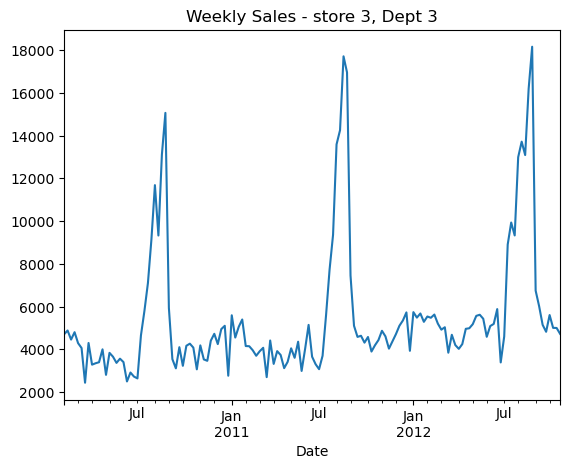

In [127]:
# Sales Trend plot
dfFiltered['Weekly_Sales'].plot(title='Weekly Sales - store 3, Dept 3')
plt.show()

In [129]:
# Data Preparation (Arima)
prophet_df = dfFiltered.reset_index()[['Date','Weekly_Sales']]
prophet_df.columns = ['ds','y']

In [131]:
# Train Model
model = Prophet()
model.fit(prophet_df)

11:36:10 - cmdstanpy - INFO - Chain [1] start processing
11:36:10 - cmdstanpy - INFO - Chain [1] done processing


C:\Users\user\anaconda3\Lib\site-packages\prophet\plot.py:71: FutureWarning: The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing python datetime objects instead of an ndarray. To retain the old behavior, call `np.array` on the result
  fcst_t = fcst['ds'].dt.to_pydatetime()
C:\Users\user\anaconda3\Lib\site-packages\prophet\plot.py:72: FutureWarning: The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing python datetime objects instead of an ndarray. To retain the old behavior, call `np.array` on the result
  ax.plot(m.history['ds'].dt.to_pydatetime(), m.history['y'], 'k.',


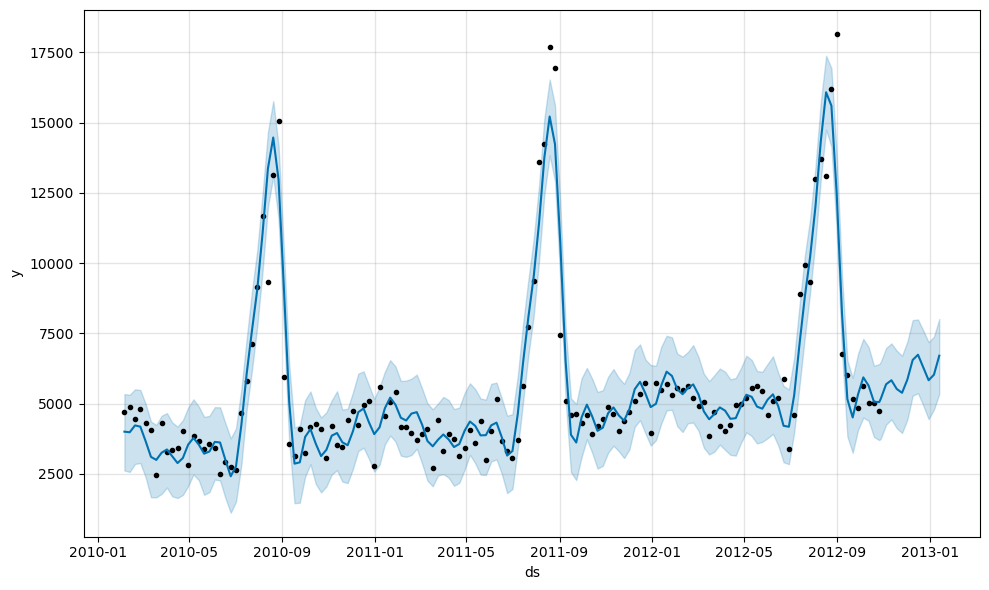

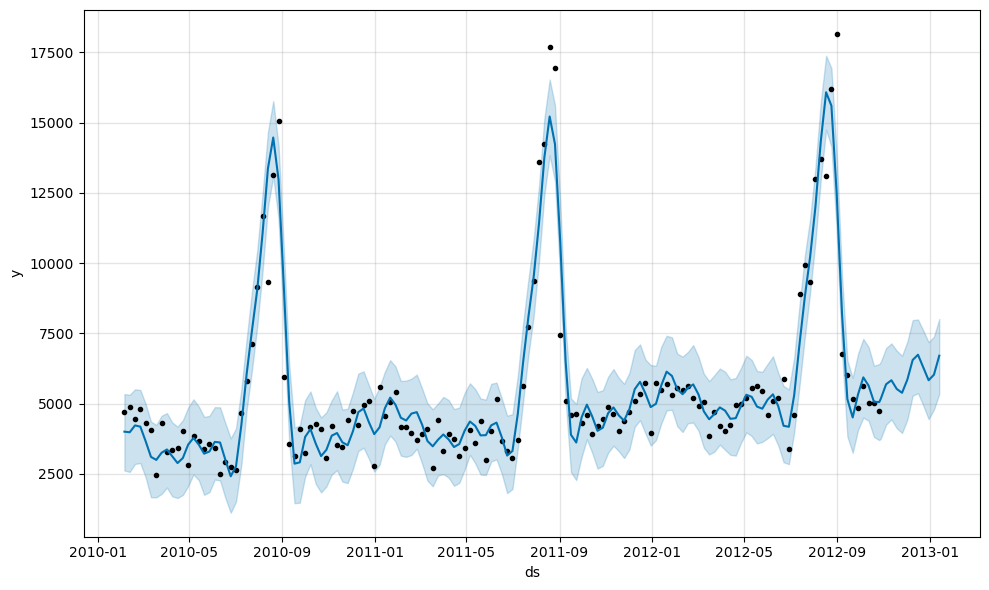

In [133]:
# Future dates
future = model.make_future_dataframe(periods=12, freq='W')
forecast= model.predict(future)
# Plot forecast
model.plot(forecast)

In [134]:
forecast[['ds','yhat','yhat_lower','yhat_upper']].to_csv('forecast_output3.csv', index=False)

In [137]:
# Merging forecast and actual data
actual = pd.read_csv("C:/Users/user/Desktop/Walmat_recruiting_sales _forecast/train.csv")

In [138]:
# filtering Store 3 and Dept 3
actualFiltered = actual[(actual['Store'] == 3) & (actual['Dept'] == 3)].copy()

In [141]:
# converting Date to date time format
actualFiltered['Date'] = pd.to_datetime(actualFiltered['Date'])

In [143]:
#Load forecast
forecast = pd.read_csv("C:/Users/user/forecast_output3.csv")
forecast['ds'] = pd.to_datetime(forecast['ds'])

In [145]:
# Merge on date
merged_df = pd.merge(actualFiltered, forecast, left_on='Date', right_on='ds', how='left')

In [147]:
#Cleaning up columns
# Merge on date
merged_df = merged_df[['Date', 'Weekly_Sales', 'yhat', 'yhat_lower', 'yhat_upper']]
merged_df.rename(columns={'Weekly_Sales': 'Actual_Sales'}, inplace=True)


In [149]:
merged_df.to_csv('actual_vs_forecast.csv', index=False)

In [151]:
print(merged_df.head())

        Date  Actual_Sales         yhat   yhat_lower   yhat_upper
0 2010-02-05       4710.29  3999.783135  2615.064118  5338.570035
1 2010-02-12       4887.08  3977.829037  2566.606798  5312.346372
2 2010-02-19       4461.75  4222.141014  2849.567280  5508.521347
3 2010-02-26       4807.77  4177.987562  2883.436762  5483.839046
4 2010-03-05       4296.57  3658.321073  2371.539473  4984.674473


In [153]:
from sklearn.metrics import mean_absolute_error, mean_squared_error

# Drop rows where forecast is missing
eval_df = merged_df.dropna(subset=['yhat'])

mae = mean_absolute_error(eval_df['Actual_Sales'], eval_df['yhat'])
rmse = mean_squared_error(eval_df['Actual_Sales'], eval_df['yhat'], squared=False)

print(f"MAE: {mae:.2f}")
print(f"RMSE: {rmse:.2f}")


MAE: 697.69
RMSE: 1050.15


C:\Users\user\anaconda3\Lib\site-packages\sklearn\metrics\_regression.py:483: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(
